In [1]:
from Swimmer import *
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import matplotlib
plt.rc('text', usetex=True)
import matplotlib

fontsize = 30
matplotlib.rcParams.update({'font.size': fontsize})
from numpy import log

## Initialization

In [2]:
T=1
R=1
a = 10*R
epsilons = np.linspace(0.1,5,50)*R

steps = 1000
nsteps = 1000
dt = T/steps

r0 = np.array([[0, 0, 0],
[0, 0, a],
[a*np.sqrt(8)/3, 0 , -a/3],
[-a*np.sqrt(8)/6, a*np.sqrt(24)/6 , -a/3],
[-a*np.sqrt(8)/6, -a*np.sqrt(24)/6, -a/3]])

### Visualization

In [3]:
def saveCoordination(r,name): 
    text  = """#version 3.7; 
    global_settings { assumed_gamma 1.0 }
    

    camera {
    location  <20, 20, 20>
    right     x*image_width/image_height
    look_at   <0, 0, 0>
    angle 58
    }

    background { color rgb<1,1,1>*0.03 }


    light_source { <-20, 30, -25> color red 0.6 green 0.6 blue 0.6 }
    light_source { < 20, 30, -25> color red 0.6 green 0.6 blue 0.6 }
    
    #declare m = 1;
    union {

    union {
    sphere { m*<""" + str(r[0,0])+ ","+ str(r[0,1])+"," +str(r[0,2])+""">, 1 }        
    sphere {  m*<"""+str(r[1,0])+","+ str(r[1,1])+"," +str(r[1,2])+""">, 1 }
    sphere {  m*<"""+str(r[2,0])+","+ str(+r[2,1])+"," +str(r[2,2])+""">, 1 }
    sphere {  m*<""" +str(r[3,0])+","+ str(r[3,1])+"," +str(r[3,2])+""">, 1}
    sphere { m*<"""+str(r[4,0])+"," +str(r[4,1])+"," +str(r[4,2])+""">, 1 }    

        pigment { color rgb<0.8,0,0>  }
    finish { ambient 0.1 diffuse 0.7 phong 1 }
    }    
    union {
    cylinder { m*<"""+str(r[1,0])+"," +str(r[1,1])+","+ str(r[1,2])+">, <"+str(r[0,0])+","+ str(r[0,1])+"," +str(r[0,2])+""">, 0.5 }
    cylinder { m*<"""+str(r[2,0])+"," +str(r[2,1])+"," +str(r[2,2])+">, <"+str(r[0,0])+"," +str(r[0,1])+","+ str(r[0,2])+""">, 0.5}
    cylinder { m*<"""+str(r[3,0])+"," +str(r[3,1])+"," +str(r[3,2])+">, <"+str(r[0,0])+"," +str(r[0,1])+"," +str(r[0,2])+""">, 0.5 }
    cylinder {  m*<""" +str(r[4,0])+"," +str(r[4,1])+","+str(r[4,2])+">, <"+str(r[0,0])+","+str(r[0,1])+","+str(r[0,2])+""">, 0.5}

    pigment { color rgb<0.6,.2,.2>  }
    finish { ambient 0.1 diffuse 0.7 phong 1 }    
    }
    
    // rotate <0, 0, 0>
    }
    """
    f = open(f"./pov/{name}.pov", "a")
    f.write(text)
    f.close()

In [4]:
epsilons

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

/tmp/ipykernel_214141/2360583985.py:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1_1.png")
/tmp/ipykernel_214141/2360583985.py:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1_1.png")
/tmp/ipykernel_214141/2360583985.py:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1_1.png")
/tmp/ipykernel_214141/2360583985.py:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inches_restore" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1_1.png")


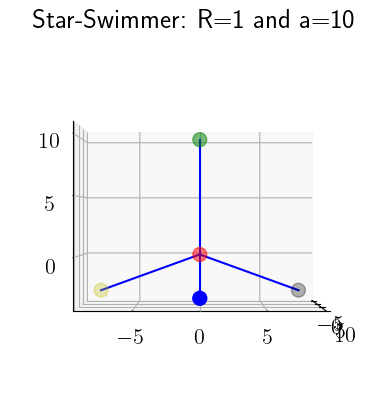

In [5]:
ax = visualize(r0)
plt.title(f"Star-Swimmer: R={R} and a={a}")
plt.savefig("1_1.png")

In [6]:
# saveCoordination(r0,"r0")

## Part1 : Comparing epsilon and changes

In [3]:
data = np.zeros((50,6))
thetas = np.zeros(50)

for i in range(50):
    epsilon = epsilons[i]
    closing  = a - np.arange(steps+1)*epsilon/steps
    opening = a - epsilon + np.arange(steps+1)*epsilon/steps
    opened = a *np.ones(steps+1)
    closed = (a-epsilon)*np.ones(steps+1)

    totalRotation = np.eye(3)
    totalDelta = 0


    
    rf1,delta,Rotation=  act(np.array([closing,opened,opened,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf2,delta,Rotation=  act(np.array([closed,closing,opened,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf3,delta,Rotation=  act(np.array([closed,closed,closing,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf4,delta,Rotation=  act(np.array([closed,closed,closed,closing]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf5,delta,Rotation=  act(np.array([opening,closed,closed,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf6,delta,Rotation=  act(np.array([opened,opening,closed,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf7,delta,Rotation=  act(np.array([opened,opened,opening,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf8,delta,Rotation=  act(np.array([opened,opened,opened,opening]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)
    
    
    data[i,0:3] = totalDelta
    data[i,3:6] = Rot.from_matrix(totalRotation).as_euler("xyz",degrees=False)
    thetas[i] = np.arccos((1 - np.trace(totalRotation))/2)

/tmp/ipykernel_716074/1706939049.py:7: RuntimeWarning: divide by zero encountered in divide
  ins.plot(np.arange(3),1/np.arange(3))


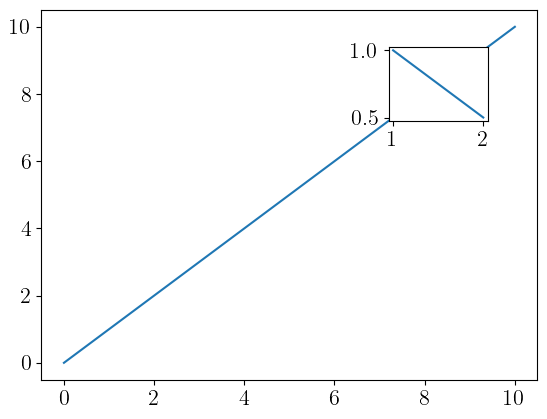

In [57]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
ax.plot(np.arange(11),np.arange(11))
ins = ax.inset_axes([0.7,0.7,0.2,0.2])
ins.plot(np.arange(3),1/np.arange(3))


In [4]:
0.1**((np.arange(0,6)))

epsilons.shape


(50,)

In [5]:
epsilons = epsilons/10

<>:14: SyntaxWarning: invalid escape sequence '\e'
<>:43: SyntaxWarning: invalid escape sequence '\e'
<>:70: SyntaxWarning: invalid escape sequence '\e'
<>:135: SyntaxWarning: invalid escape sequence '\m'
<>:136: SyntaxWarning: invalid escape sequence '\m'
<>:137: SyntaxWarning: invalid escape sequence '\m'
<>:145: SyntaxWarning: invalid escape sequence '\d'
<>:146: SyntaxWarning: invalid escape sequence '\d'
<>:147: SyntaxWarning: invalid escape sequence '\d'
<>:148: SyntaxWarning: invalid escape sequence '\d'
<>:149: SyntaxWarning: invalid escape sequence '\d'
<>:150: SyntaxWarning: invalid escape sequence '\d'
<>:154: SyntaxWarning: invalid escape sequence '\d'
<>:155: SyntaxWarning: invalid escape sequence '\d'
<>:156: SyntaxWarning: invalid escape sequence '\d'
<>:157: SyntaxWarning: invalid escape sequence '\d'
<>:158: SyntaxWarning: invalid escape sequence '\d'
<>:159: SyntaxWarning: invalid escape sequence '\d'
<>:160: SyntaxWarning: invalid escape sequence '\e'
<>:14: SyntaxWa

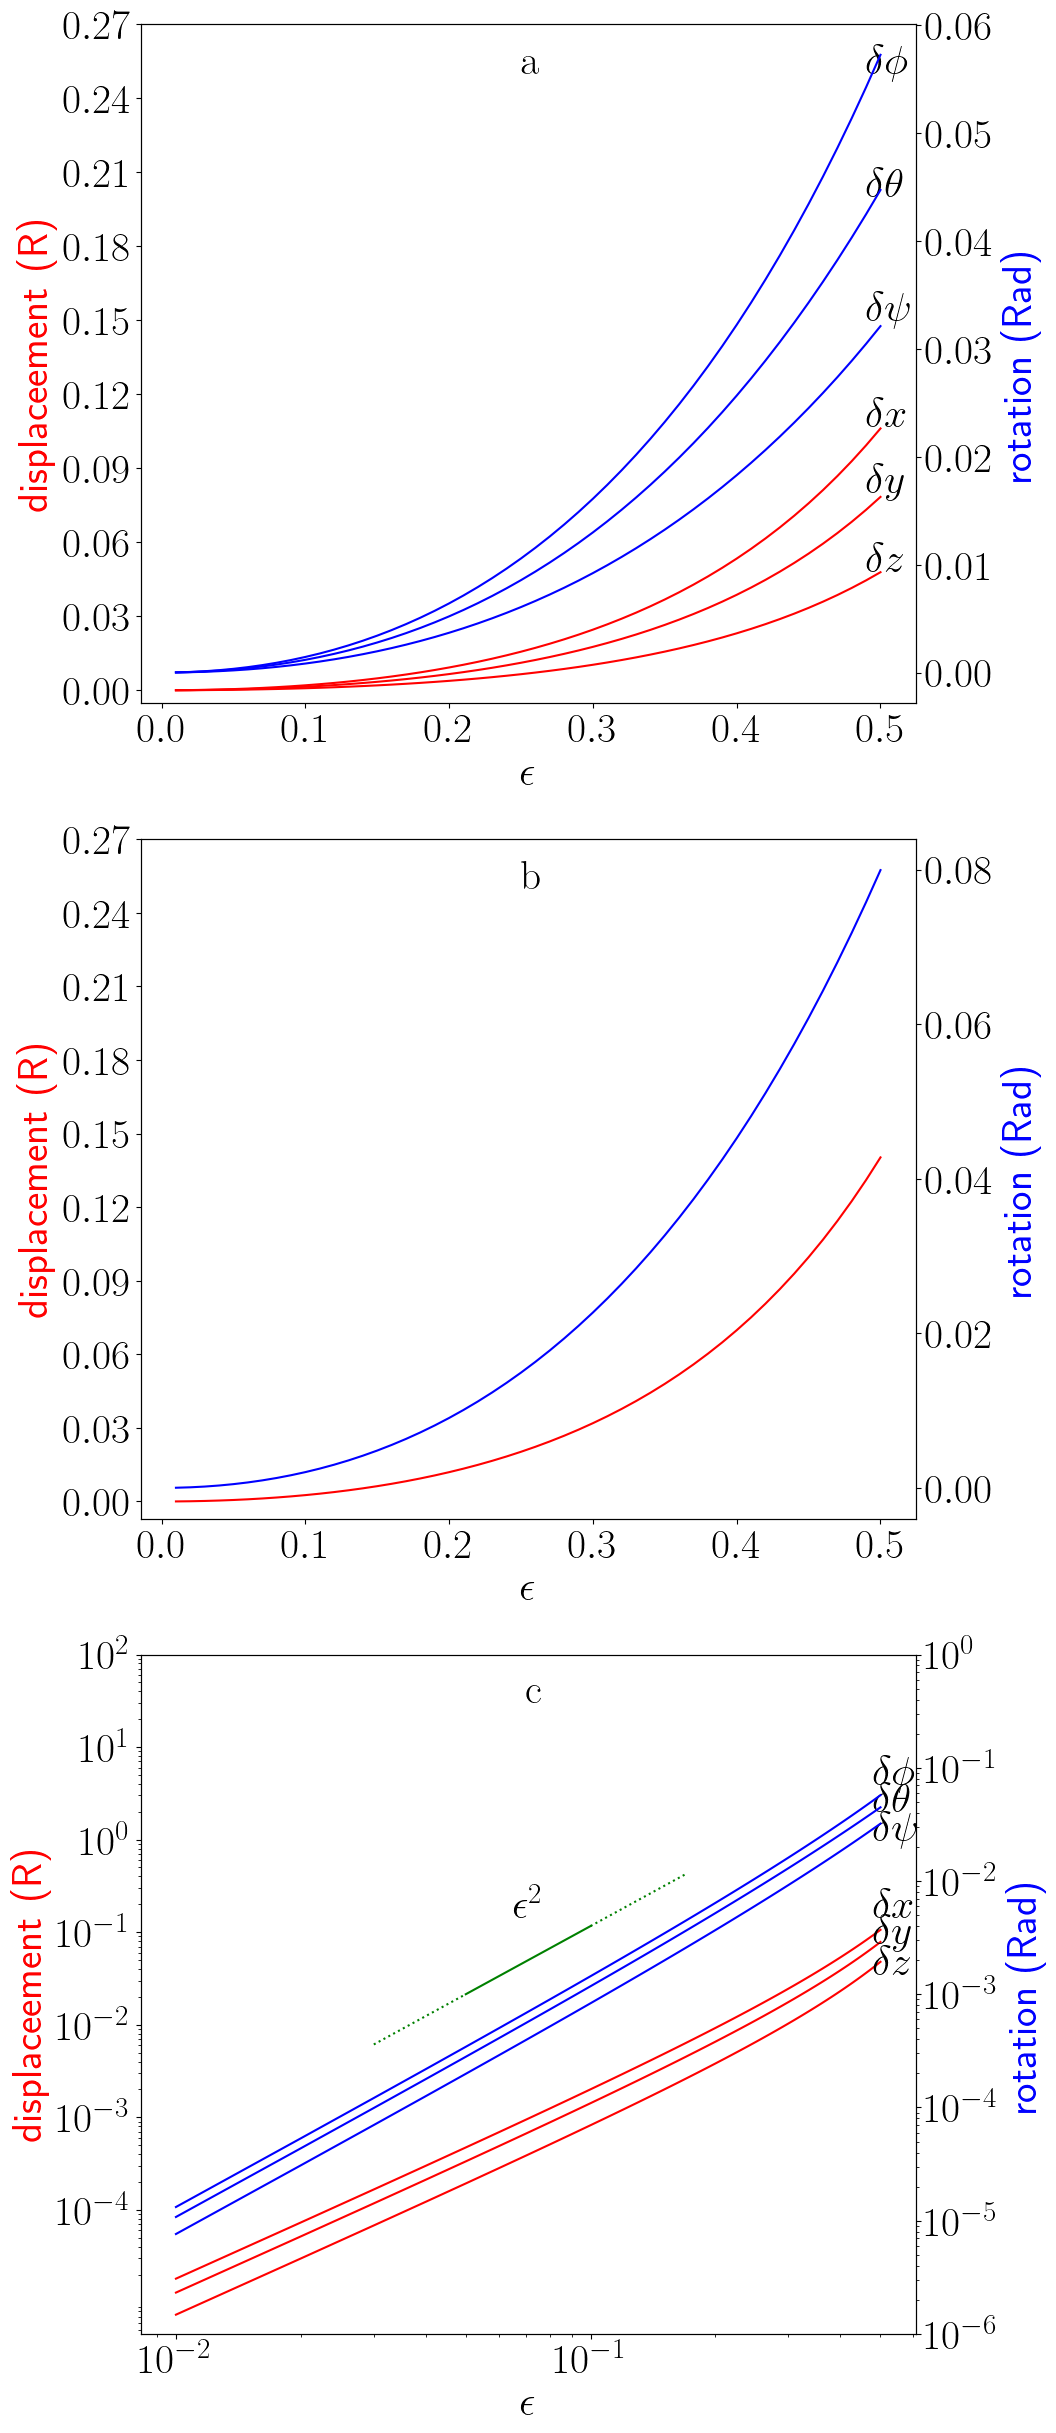

In [12]:
fig = plt.figure(figsize=(10,30))
ax1=fig.add_subplot(312)
ax2 = ax1.twinx()


ax1.plot(epsilons,np.linalg.norm(data[:,0:3],axis=1) ,c ="r")



slope  = scipy.stats.linregress(np.log(epsilons),np.log(np.linalg.norm(data[:,0:3],axis=1)))[0]



ax1.set_xlabel("$\epsilon$")
ax1.set_ylabel("displacement (R)")
ax2.set_ylabel("rotation (Rad)")



slope  = scipy.stats.linregress(np.log(epsilons),np.log(np.linalg.norm(data[:,0:3],axis=1)))[0]


ax2.plot(epsilons,(np.pi - thetas), c = "b")



slope  = scipy.stats.linregress(np.log(epsilons),np.log(np.pi - thetas))[0]



slopes = []  
for i in range(6):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log(epsilons[:]),np.log(np.abs(data[:,i])))
    slopes.append(slope)
    # print(slope)




ax3=fig.add_subplot(311)


ax3.set_xlabel("$\epsilon$")

ax3.set_ylabel("displaceement (R)")
for i in range(3):
    ax3.plot(epsilons,np.abs( data[:,i]), c = "r")


ax3b = ax3.twinx()
ax3b.set_ylabel("rotation (Rad)")
for i in range(3,6):
    ax3b.plot(epsilons,np.abs(data[:,i]) , c ="b")




# ax3.legend(["x","y","z","theta","phi","psi"],loc='upper center', bbox_to_anchor=(0.5, 1.3),
#           ncol=3, fancybox=True, shadow=True)

# plt.savefig("1-2.png", bbox_inches="tight")
# plt.show()


# plt.Figure(figsize=(10,10))
# #plt.title("log of change in position and orientation vs  log of epsilon for R=1 and a=10")

ax4=fig.add_subplot(313)

ax4.set_xlabel("$\epsilon$")
ax4.set_ylabel("displaceement (R)")



for i in range(3):
    ax4.loglog(epsilons,np.abs(data[:,i]) , c= "r")


ax4b = ax4.twinx()

for i in range(3,6):
    ax4b.loglog(epsilons,np.abs(data[:,i]), c = "b")


ax4b.set_ylabel("rotation (Rad)")




quadric = 0.2*epsilons**2


yfactor = 2
ax4b.plot(epsilons[2:5], yfactor*quadric[2:5] , c = "g" , linestyle='dotted')
ax4b.plot(epsilons[4:10], yfactor*quadric[4:10] , c = "g")
ax4b.plot(epsilons[9:17], yfactor*quadric[9:17] , c = "g" , linestyle='dotted')




ax1.set_yticks(np.arange(0,30,3)/100)
ax3.set_yticks(np.arange(0,30,3)/100)
ax4.set_yticks(0.1**((np.arange(-2,5))))
ax4b.set_yticks(0.1**((np.arange(0,7))))










# ax1.text(2.5, 0.06, '$rotation$', fontsize = 14)
# ax1.text(3.5, 0.03, '$displacement$', fontsize = 14)






# ax1.set_title("$\mathrm{b}$")
# ax3.set_title("$\mathrm{a}$")
# ax4.set_title("$\mathrm{c}$")


ax1.yaxis.label.set_color('red')
ax2.yaxis.label.set_color('blue')
ax3.yaxis.label.set_color('red')
ax3b.yaxis.label.set_color('blue')
ax4.yaxis.label.set_color('red')
ax4b.yaxis.label.set_color('blue')

ax1.text(2.5/10, 0.25, "$\mathrm{b}$", fontsize = fontsize)
ax3.text(2.5/10, 0.25, "$\mathrm{a}$", fontsize = fontsize)
ax4.text(0.7/10, 30, "$\mathrm{c}$", fontsize = fontsize)




yfactoe2 = 5
yfactoe3 = 0.7

ax3.text((5-0.1)/10, 0.107, '$\delta x$', fontsize = fontsize)
ax3.text((5-0.1)/10, 0.08, '$\delta y$', fontsize = fontsize)
ax3.text((5-0.1)/10, 0.048, '$\delta z$', fontsize = fontsize)
ax3.text((5-0.1)/10, 0.25, '$\delta \phi$', fontsize = fontsize)
ax3.text((5-0.1)/10, 0.20, '$\delta \\theta$', fontsize = fontsize)
ax3.text((5-0.1)/10, 0.15, '$\delta \psi$', fontsize = fontsize)



ax4.text((5-0.2)/10, 0.10/yfactoe3, '$\delta x$', fontsize = fontsize)
ax4.text((5-0.2)/10, 0.075, '$\delta y$', fontsize = fontsize)
ax4.text((5-0.2)/10, 0.05*yfactoe3, '$\delta z$', fontsize = fontsize)
ax4.text((5-0.2)/10, yfactoe2*0.4, '$\delta \\theta$', fontsize = fontsize)
ax4.text((5-0.2)/10, yfactoe2*0.28*yfactoe3, '$\delta \psi$', fontsize = fontsize)
ax4.text((5-0.2)/10, yfactoe2*0.55/yfactoe3, '$\delta \phi$', fontsize = fontsize)
ax4.text(0.065, 0.10/yfactoe3, '$\epsilon^2$', fontsize = fontsize)

plt.savefig("EpsilonEffect.png", bbox_inches="tight")
plt.show()


In [10]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log(epsilons[:]),np.log(np.abs(data[:,0])))
print(slope)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log(epsilons[:]),np.log(np.abs(data[:,1])))
print(slope)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log(epsilons[:]),np.log(np.abs(data[:,2])))
print(slope)

2.2566607069210125
2.2711108478851907
2.245650916036956


In [5]:
As = np.linspace(5,25,20)*R
Rs = np.linspace(1,3,20)

In [51]:
data2 = np.zeros((20,6))
thetas2 = np.zeros(20)
for i in range(20):

    a = As[i]
    epsilon = 0.3*a
    closing  = a - np.arange(steps+1)*epsilon/steps
    opening = a - epsilon + np.arange(steps+1)*epsilon/steps
    opened = a *np.ones(steps+1)
    closed = (a-epsilon)*np.ones(steps+1)

    totalRotation = np.eye(3)
    totalDelta = 0


    
    rf1,delta,Rotation=  act(np.array([closing,opened,opened,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf2,delta,Rotation=  act(np.array([closed,closing,opened,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf3,delta,Rotation=  act(np.array([closed,closed,closing,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf4,delta,Rotation=  act(np.array([closed,closed,closed,closing]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf5,delta,Rotation=  act(np.array([opening,closed,closed,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf6,delta,Rotation=  act(np.array([opened,opening,closed,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf7,delta,Rotation=  act(np.array([opened,opened,opening,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf8,delta,Rotation=  act(np.array([opened,opened,opened,opening]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)
    
    
    data2[i,0:3] = totalDelta
    data2[i,3:6] = Rot.from_matrix(totalRotation).as_euler("xyz",degrees=False)
    thetas2[i] = np.arccos((1 - np.trace(totalRotation))/2)

/tmp/ipykernel_5996/695019244.py:176: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("DEffect.png")
/tmp/ipykernel_5996/695019244.py:176: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("DEffect.png")
/tmp/ipykernel_5996/695019244.py:176: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("DEffect.png")
/tmp/ipykernel_5996/695019244.py:176: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inches_restore" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("DEffect.png")


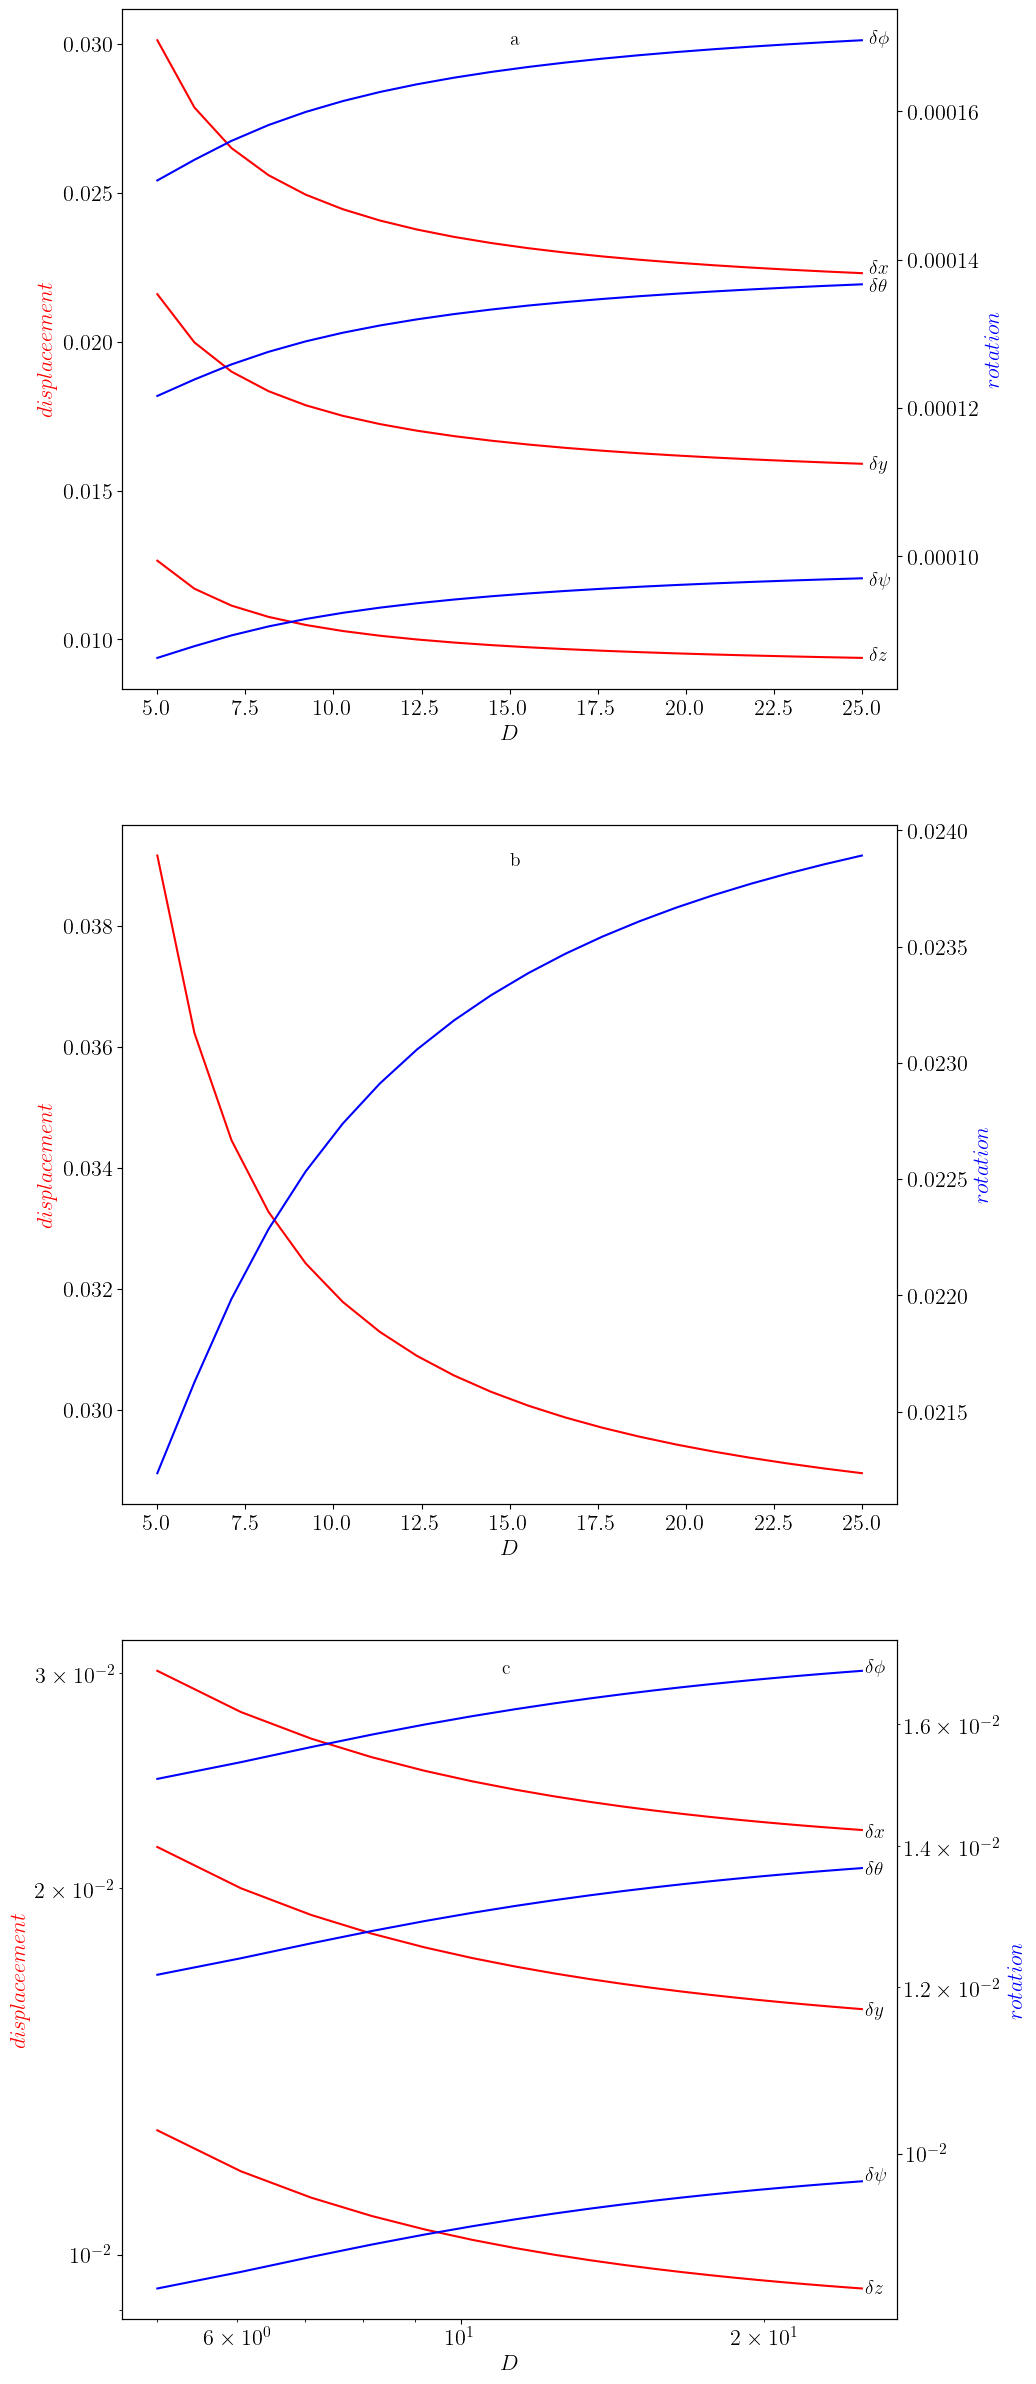

In [67]:



fig = plt.figure(figsize=(10,30))
ax1=fig.add_subplot(312)
ax2 = ax1.twinx()


ax1.plot(As,np.linalg.norm(data2[:,0:3],axis=1) ,c ="r")



slope  = scipy.stats.linregress(np.log(As),np.log(np.linalg.norm(data2[:,0:3],axis=1)))[0]



ax1.set_xlabel("$D$")
ax1.set_ylabel("$displacement$")
ax2.set_ylabel("$rotation$")









# ins1 = ax1.inset_axes([0.2,0.6,0.2,0.2])
# ins1.loglog(epsilons,np.linalg.norm(data[:,0:3],axis=1))


slope  = scipy.stats.linregress(np.log(As),np.log(np.linalg.norm(data2[:,0:3],axis=1)))[0]





# plt.savefig("log_displacement1.png", bbox_inches="tight")
# plt.show()



ax2.plot(As,(np.pi - thetas2), c = "b")










# ins2 = ax.inset_axes([0.2,0.6,0.2,0.2])

# ins2.plot(log(epsilons),log(180*(np.pi - thetas)/np.pi))



slope  = scipy.stats.linregress(np.log(As),np.log((np.pi - thetas2)))[0]

# plt.xlabel("$ln(\epsilon)$")
# plt.ylabel("$ln(rotation)$")
# plt.title(f"log(rotation) vs log(epsilon), slope = {np.round(slope,3)}")







slopes = []  
for i in range(6):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log(As[:]),np.log(np.abs(data2[:,i])))
    slopes.append(slope)
    # print(slope)


#plt.title("change in position and orientation vs epsilon for R=1 and a=10")



ax3=fig.add_subplot(311)


ax3.set_xlabel("$D$")

ax3.set_ylabel("$displaceement$")
for i in range(3):
    ax3.plot(As,np.abs(data2[:,i]), c = "r")


ax3b = ax3.twinx()
ax3b.set_ylabel("$rotation$")
for i in range(3,6):
    ax3b.plot(As,np.abs(0.01*data2[:,i]) , c ="b")

# ax3.legend(["x","y","z","theta","phi","psi"],loc='upper center', bbox_to_anchor=(0.5, 1.3),
#           ncol=3, fancybox=True, shadow=True)

# plt.savefig("1-2.png", bbox_inches="tight")
# plt.show()


# plt.Figure(figsize=(10,10))
# #plt.title("log of change in position and orientation vs  log of epsilon for R=1 and a=10")

ax4=fig.add_subplot(313)

ax4.set_xlabel("$D$")
ax4.set_ylabel("$displaceement$")



for i in range(3):
    ax4.loglog(As,np.abs(data2[:,i]) , c= "r")


ax4b = ax4.twinx()

for i in range(3,6):
    ax4b.loglog(As,np.abs(data2[:,i]), c = "b")
ax4b.set_ylabel("$rotation$")


# #plt.legend([f"x,slope={np.round(slopes[0],2)}",f"y,slope={np.round(slopes[1],2)}",f"z,slope={np.round(slopes[2],2)}",f"theta,slope={np.round(slopes[3],2)}",f"phi,slope={np.round(slopes[4],2)}",f"psi,slope={np.round(slopes[5],2)}","quadric line"])
# plt.legend(["x","y","z","theta","phi","psi","quadric line"],loc='upper center', bbox_to_anchor=(0.5, 1.4),
#           ncol=3, fancybox=True, shadow=True)




# plt.savefig("1-3.png", bbox_inches="tight")
# plt.show()


# ax1.text(15, 0.038, '$rotation$', fontsize = 14)
# ax1.text(15, 0.031, '$displacement$', fontsize = 14)



ax3.text(25.2, 0.03, '$\delta \phi$', fontsize = 14)
ax3.text(25.2, 0.0217, '$\delta \\theta$', fontsize = 14)
ax3.text(25.2, 0.0118, '$\delta \\psi$', fontsize = 14)

ax3.text(25.2, 0.0223, '$\delta x$', fontsize = 14)
ax3.text(25.2, 0.0157, '$\delta y$', fontsize = 14)
ax3.text(25.2, 0.0093, '$\delta z$', fontsize = 14)




ax4.text(25.2, 0.022, '$\delta x$', fontsize = 14)
ax4.text(25.2, 0.0157, '$\delta y$', fontsize = 14)
ax4.text(25.2, 0.0093, '$\delta z$', fontsize = 14)

ax4.text(25.2, 0.03, '$\delta \phi$', fontsize = 14)
ax4.text(25.2, 0.0205, '$\delta \\theta$', fontsize = 14)
ax4.text(25.2, 0.0115, '$\delta \\psi$', fontsize = 14)

# ax1.set_title("$\mathrm{b)}$")
# ax3.set_title("$\mathrm{a)}$")
# ax4.set_title("$\mathrm{c)}$")


ax1.text(15, 0.039, "$\mathrm{b}$", fontsize = 14)
ax3.text(15, 0.03, "$\mathrm{a}$", fontsize = 14)
ax4.text(11, 0.03, "$\mathrm{c}$", fontsize = 14)


ax1.yaxis.label.set_color('red')
ax2.yaxis.label.set_color('blue')
ax3.yaxis.label.set_color('red')
ax3b.yaxis.label.set_color('blue')
ax4.yaxis.label.set_color('red')
ax4b.yaxis.label.set_color('blue')

plt.savefig("DEffect.png")


plt.show()

/tmp/ipykernel_214141/2809931803.py:36: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("log_displacement2.png", bbox_inches="tight")
/tmp/ipykernel_214141/2809931803.py:36: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("log_displacement2.png", bbox_inches="tight")
/tmp/ipykernel_214141/2809931803.py:36: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("log_displacement2.png", bbox_inches="tight")
/tmp/ipykernel_214141/2809931803.py:36: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will becom

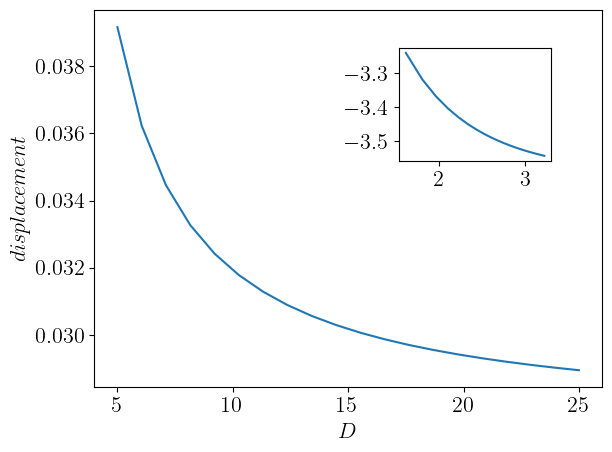

In [14]:


plt.Figure(figsize=(10,10))
fig,ax = plt.subplots(tight_layout=True)
plt.plot(As,np.linalg.norm(data2[:,0:3],axis=1))



# slope  = scipy.stats.linregress(np.log(epsilons),np.log(np.linalg.norm(data[:,0:3],axis=1)))[0]

plt.xlabel("$D$")
plt.ylabel("$displacement$")
# plt.title(f"displacement vs A")








ins = ax.inset_axes([0.6,0.6,0.3,0.3])

ins.plot(np.log(As),np.log(np.linalg.norm(data2[:,0:3],axis=1)))



# slope  = scipy.stats.linregress(np.log(As),np.log(np.linalg.norm(data2[:,0:3],axis=1)))[0]

# plt.xlabel("log(A)")
# plt.ylabel("(log(displacement)")
# plt.title(f"log(displacement) vs log(A), slope = {np.round(slope,3)}")





plt.savefig("log_displacement2.png", bbox_inches="tight")
plt.show()




# plt.Figure(figsize=(10,10))

# plt.plot(As,np.linalg.norm(data2[:,0:3],axis=1))

# plt.savefig("displacement2.png")

/tmp/ipykernel_214141/846695286.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("log_degree2.png", bbox_inches="tight")
/tmp/ipykernel_214141/846695286.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("log_degree2.png", bbox_inches="tight")
/tmp/ipykernel_214141/846695286.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("log_degree2.png", bbox_inches="tight")
/tmp/ipykernel_214141/846695286.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor r

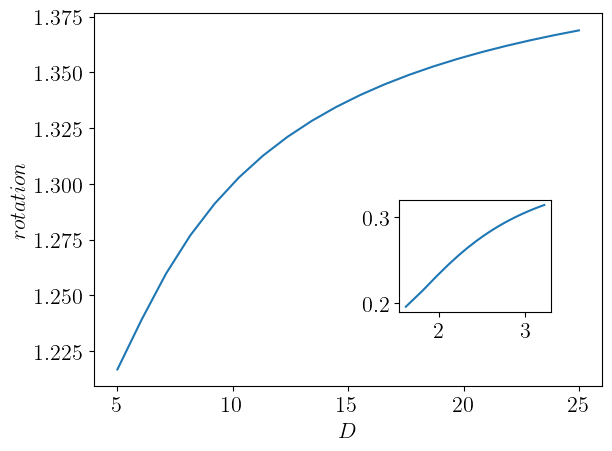

In [15]:
plt.Figure(figsize=(10,10))
fig,ax = plt.subplots(tight_layout=True)
plt.plot(As,180*(np.pi - thetas2[:20])/np.pi)




plt.xlabel("$D$")
plt.ylabel("$rotation$")
# plt.title(f"rotation vs A")




# plt.savefig("degree2.png", bbox_inches="tight")
# plt.show()



# plt.Figure(figsize=(10,10))
# plt.subplots(tight_layout=True)
ins = ax.inset_axes([0.6,0.2,0.3,0.3])


ins.plot(log(As),log(180*(np.pi - thetas2[:20])/np.pi))



# slope  = scipy.stats.linregress(np.log(As),np.log(180*(np.pi - thetas2[:20])/np.pi))[0]

# plt.xlabel("log(A)")
# plt.ylabel("log(rotation)")
# plt.title(f"log(rotation) vs log(A), slope = {np.round(slope,3)}")




plt.savefig("log_degree2.png", bbox_inches="tight")
plt.show()

-0.16659725329922934
-0.16180152675140125
-0.16294937419612868
0.07081448339547222
0.071383717137344
0.07046730196010045


/tmp/ipykernel_214141/529434769.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1-4.png", bbox_inches="tight")
/tmp/ipykernel_214141/529434769.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1-4.png", bbox_inches="tight")
/tmp/ipykernel_214141/529434769.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1-4.png", bbox_inches="tight")
/tmp/ipykernel_214141/529434769.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.save

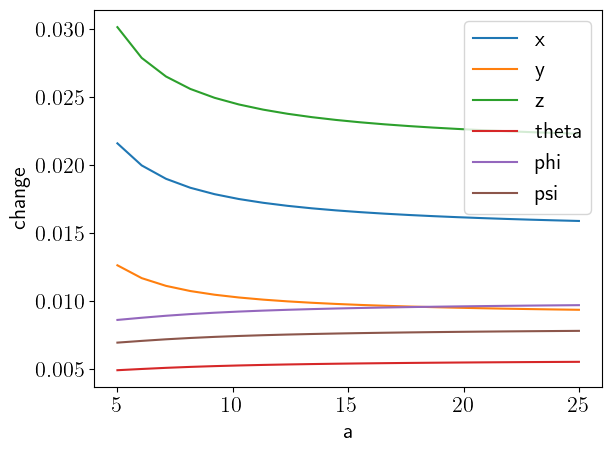

/tmp/ipykernel_214141/529434769.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1-5.png", bbox_inches="tight")
/tmp/ipykernel_214141/529434769.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1-5.png", bbox_inches="tight")
/tmp/ipykernel_214141/529434769.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1-5.png", bbox_inches="tight")
/tmp/ipykernel_214141/529434769.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.save

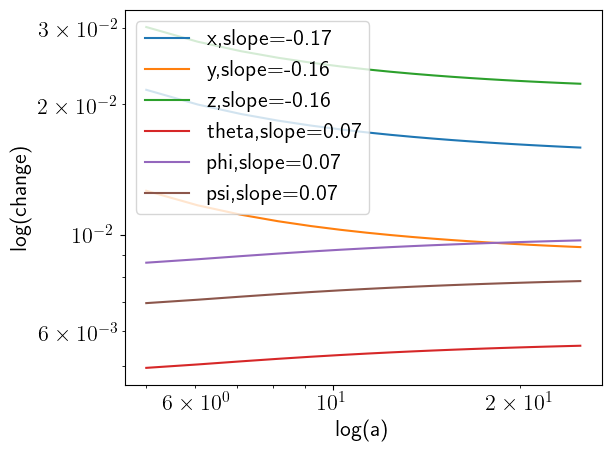

In [16]:
slopes2 = []  
for i in range(6):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log(As[:]),np.log(np.abs(data2[:,i])))
    slopes2.append(slope)
    print(slope)

plt.Figure(figsize=(10,10))
plt.subplots(tight_layout=True)

# plt.title("change in position and orientation vs a for R=1 and eps=0.3")
plt.xlabel("a")
plt.ylabel("change")
for i in range(3):
    plt.plot(As,np.abs(data2[:,i]))


for i in range(3,6):
    plt.plot(As,np.abs(0.01*data2[:,i]))

plt.legend(["x","y","z","theta","phi","psi"])
plt.savefig("1-4.png", bbox_inches="tight")
plt.show()


plt.Figure(figsize=(10,10))
plt.subplots(tight_layout=True)

# plt.title("log of change in position and orientation vs log of a for R=1 and eps=0.3")
plt.xlabel("log(a)")
plt.ylabel("log(change)")
for i in range(3):
    plt.loglog(As,np.abs(data2[:,i]))

for i in range(3,6):
    plt.loglog(As,0.01*np.abs(data2[:,i]))

plt.legend([f"x,slope={np.round(slopes2[0],2)}",f"y,slope={np.round(slopes2[1],2)}",f"z,slope={np.round(slopes2[2],2)}",f"theta,slope={np.round(slopes2[3],2)}",f"phi,slope={np.round(slopes2[4],2)}",f"psi,slope={np.round(slopes2[5],2)}"])
plt.savefig("1-5.png", bbox_inches="tight")
plt.show()


In [17]:
data3 = np.zeros((20,6))
thetas3 = np.zeros(50)
for i in range(20):
    r = Rs[i]

    a = 10*r
    epsilon = 0.3*a
    closing  = a - np.arange(steps+1)*epsilon/steps
    opening = a - epsilon + np.arange(steps+1)*epsilon/steps
    opened = a *np.ones(steps+1)
    closed = (a-epsilon)*np.ones(steps+1)

    totalRotation = np.eye(3)
    totalDelta = 0


    
    rf1,delta,Rotation=  act(np.array([closing,opened,opened,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf2,delta,Rotation=  act(np.array([closed,closing,opened,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf3,delta,Rotation=  act(np.array([closed,closed,closing,opened]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf4,delta,Rotation=  act(np.array([closed,closed,closed,closing]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf5,delta,Rotation=  act(np.array([opening,closed,closed,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf6,delta,Rotation=  act(np.array([opened,opening,closed,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf7,delta,Rotation=  act(np.array([opened,opened,opening,closed]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf8,delta,Rotation=  act(np.array([opened,opened,opened,opening]))
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)
    
    
    data3[i,0:3] = totalDelta
    data3[i,3:6] = Rot.from_matrix(totalRotation).as_euler("xyz",degrees=True)
    thetas3[i] = np.arccos((1 - np.trace(totalRotation))/2)

/tmp/ipykernel_214141/444036031.py:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("displacement3.png", bbox_inches="tight")
/tmp/ipykernel_214141/444036031.py:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("displacement3.png", bbox_inches="tight")
/tmp/ipykernel_214141/444036031.py:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("displacement3.png", bbox_inches="tight")
/tmp/ipykernel_214141/444036031.py:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two m

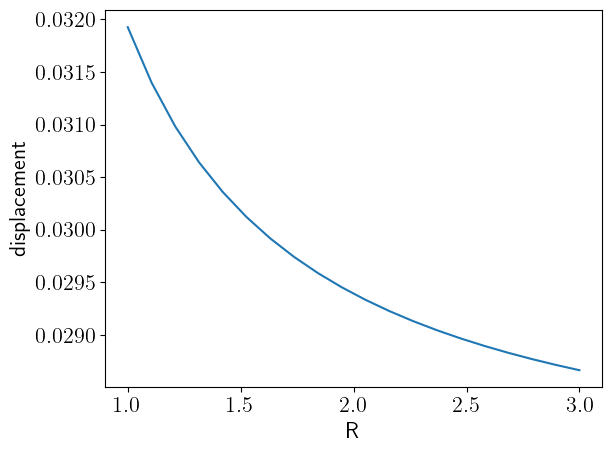

/tmp/ipykernel_214141/444036031.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("log_displacement3.png", bbox_inches="tight")
/tmp/ipykernel_214141/444036031.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("log_displacement3.png", bbox_inches="tight")
/tmp/ipykernel_214141/444036031.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("log_displacement3.png", bbox_inches="tight")
/tmp/ipykernel_214141/444036031.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an

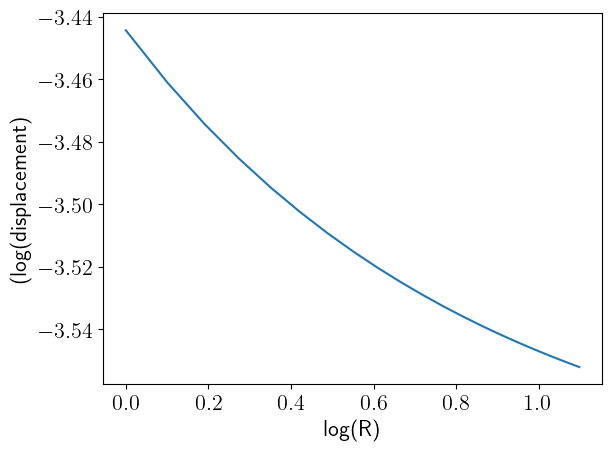

In [18]:


plt.Figure(figsize=(10,10))
plt.subplots(tight_layout=True)
plt.plot(Rs,np.linalg.norm(data3[:,0:3],axis=1))



# slope  = scipy.stats.linregress(np.log(epsilons),np.log(np.linalg.norm(data[:,0:3],axis=1)))[0]

plt.xlabel("R")
plt.ylabel("displacement")
# plt.title(f"displacement vs R")





plt.savefig("displacement3.png", bbox_inches="tight")
plt.show()



plt.Figure(figsize=(10,10))
plt.subplots(tight_layout=True)
plt.plot(np.log(Rs),np.log(np.linalg.norm(data3[:,0:3],axis=1)))



slope  = scipy.stats.linregress(np.log(Rs),np.log(np.linalg.norm(data3[:,0:3],axis=1)))[0]

plt.xlabel("log(R)")
plt.ylabel("(log(displacement)")
# plt.title(f"log(displacement) vs log(R), slope = {np.round(slope,3)}")





plt.savefig("log_displacement3.png", bbox_inches="tight")
plt.show()





# plt.Figure(figsize=(10,10))

# plt.plot(As,np.linalg.norm(data2[:,0:3],axis=1))

# plt.savefig("displacement2.png")

/tmp/ipykernel_214141/2431810423.py:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("degree3.png", bbox_inches="tight")
/tmp/ipykernel_214141/2431810423.py:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("degree3.png", bbox_inches="tight")
/tmp/ipykernel_214141/2431810423.py:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("degree3.png", bbox_inches="tight")
/tmp/ipykernel_214141/2431810423.py:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases 

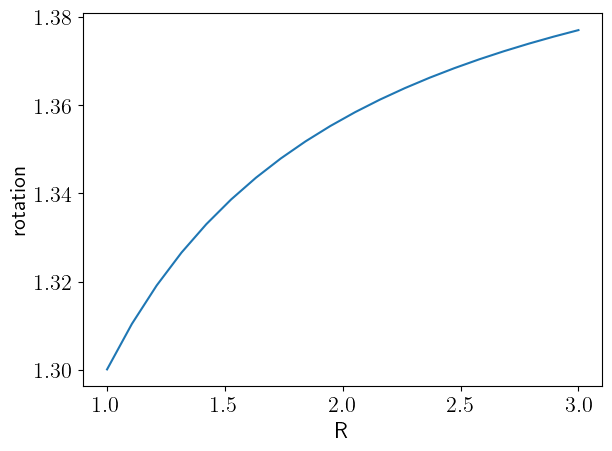

/tmp/ipykernel_214141/2431810423.py:35: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("log_degree3.png", bbox_inches="tight")
/tmp/ipykernel_214141/2431810423.py:35: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("log_degree3.png", bbox_inches="tight")
/tmp/ipykernel_214141/2431810423.py:35: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("log_degree3.png", bbox_inches="tight")
/tmp/ipykernel_214141/2431810423.py:35: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two min

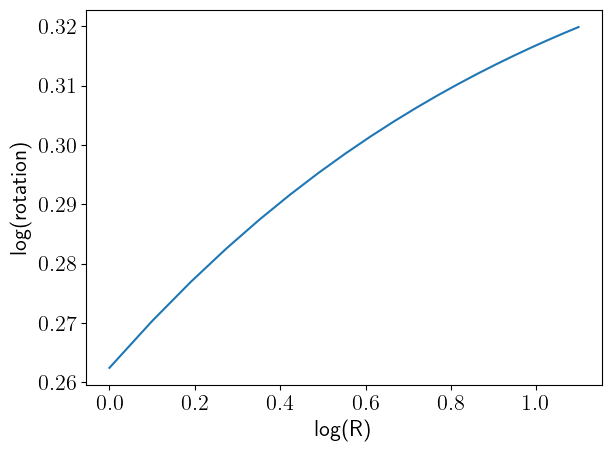

In [19]:
plt.Figure(figsize=(10,10))
plt.subplots(tight_layout=True)
plt.plot(Rs,180*(np.pi - thetas3[:20])/np.pi)




plt.xlabel("R")
plt.ylabel("rotation")
# plt.title(f"rotation vs R")




plt.savefig("degree3.png", bbox_inches="tight")
plt.show()



plt.Figure(figsize=(10,10))
plt.subplots(tight_layout=True)
plt.plot(log(Rs),log(180*(np.pi - thetas3[:20])/np.pi))



slope  = scipy.stats.linregress(np.log(Rs),np.log(180*(np.pi - thetas3[:20])/np.pi))[0]

plt.xlabel("log(R)")
plt.ylabel("log(rotation)")
# plt.title(f"log(rotation) vs log(R), slope = {np.round(slope,3)}")




plt.savefig("log_degree3.png", bbox_inches="tight")
plt.show()

-0.09654065902221588
-0.09127035284742445
-0.09082726057800174
0.05010810489042857
0.050524465962579694
0.04985718833806309


/tmp/ipykernel_214141/2329375089.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1-6.png", bbox_inches="tight")
/tmp/ipykernel_214141/2329375089.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1-6.png", bbox_inches="tight")
/tmp/ipykernel_214141/2329375089.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1-6.png", bbox_inches="tight")
/tmp/ipykernel_214141/2329375089.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inches_restore" which is no longer supported as of 3.3 and will become an error two minor releases late

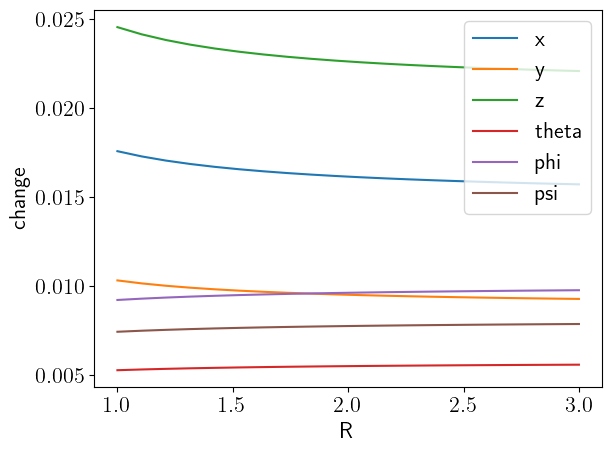

/tmp/ipykernel_214141/2329375089.py:32: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1-7.png", bbox_inches="tight")
/tmp/ipykernel_214141/2329375089.py:32: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1-7.png", bbox_inches="tight")
/tmp/ipykernel_214141/2329375089.py:32: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1-7.png", bbox_inches="tight")
/tmp/ipykernel_214141/2329375089.py:32: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.

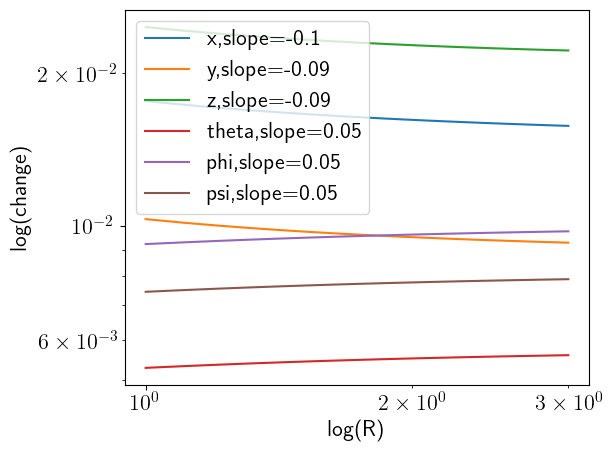

In [20]:
slopes3 = []  

for i in range(6):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log(Rs[:]),np.log(np.abs(data3[:,i])))
    slopes3.append(slope)
    print(slope)

plt.Figure(figsize=(10,10))
plt.subplots(tight_layout=True)
# plt.title("change in position and orientation vs R for a=10R and eps=3")
plt.xlabel("R")
plt.ylabel("change")
for i in range(3):
    plt.plot(Rs,np.abs(data3[:,i]))
for i in range(3,6):
    plt.plot(Rs,0.01*np.abs(data3[:,i]))
plt.legend(["x","y","z","theta","phi","psi"])
plt.savefig("1-6.png", bbox_inches="tight")
plt.show()


plt.Figure(figsize=(10,10))
plt.subplots(tight_layout=True)
# plt.title("log of change in position and orientation vs R for a=10R and eps=3")
plt.xlabel("log(R)")
plt.ylabel("log(change)")
for i in range(3):
    plt.loglog(Rs,np.abs(data3[:,i]))
for i in range(3,6):
    plt.loglog(Rs,0.01*np.abs(data3[:,i]))
plt.legend([f"x,slope={np.round(slopes3[0],2)}",f"y,slope={np.round(slopes3[1],2)}",f"z,slope={np.round(slopes3[2],2)}",f"theta,slope={np.round(slopes3[3],2)}",f"phi,slope={np.round(slopes3[4],2)}",f"psi,slope={np.round(slopes3[5],2)}"])
plt.savefig("1-7.png", bbox_inches="tight")
plt.show()


In [21]:

# plt.Figure(figsize=(10,10))
# plt.subplots(tight_layout=True)
# plt.plot(Rs,np.linalg.norm(data3[:,0:3],axis=1))

# plt.savefig("displacement1.png")

$ \delta r =  0.004 * R^{1} .\epsilon_{partial}^{2.25} . D^{-0.16} $

In [22]:
10 **(0.16) *  0.0028624972580132977

0.004137567380383587

In [23]:
np.save("epsilons", epsilons)
np.save("Rs", Rs)
np.save("As" , As)
np.save("data1" , data)
np.save("thetas1" , thetas)
np.save("data2" , data2)
np.save("thetas2", thetas2)
np.save("data3" ,data3)
np.save("thetas3", thetas3)
